# Введение в искусственные нейронные сети
# Урок 5. Рекуррентные нейронные сети

## Содержание методического пособия:


<ol>
<li>Что такое Рекурретные нейронные сети</li>
<li>Архитектура Рекуррентных нейронных сетей</li>
<li>Пример на Keras рекуррентной нейронной сети</li>
</ol>

## Что такое Рекуррентные нейронные сети





Нейронные сети которые мы разбирали ранее относяться к классу feed forward нейронных сетей или сетей прямого распространения. Выходной сигнал слоя в этих нейронных сетях передавался напрямую в следующий слой. Однако есть задачи, в которых нам нужно обучать нейронную сеть не на единичных экземплярах наподобие изображений, а на наборах последовательностей, например последовательностей слов. 

В рекуррентной нейронной сети выходной сигнал внутренних слоев циркулирует в этих слоях некоторое время. При обучении такой нейронной сети прежние выходные сигналы используются как дополнительные input'ы. Можно сказать, что эти дополнительные input'ы конкатенируются с "нормальными" input'ами предыдущего слоя.




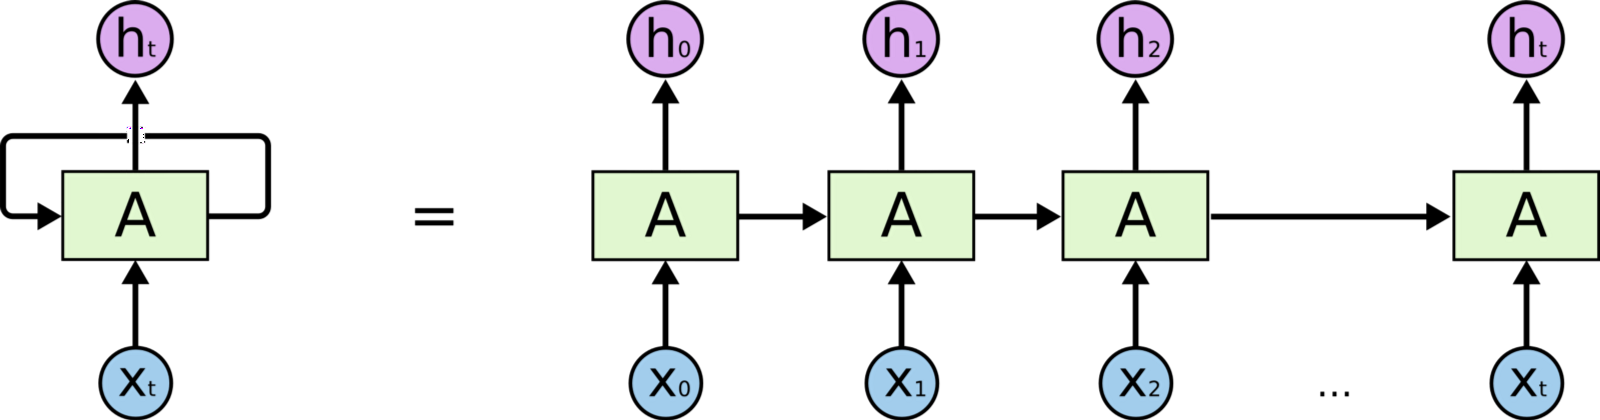

Источник: https://medium.com/

Реккурентные нейронные сети используются например для того, чтобы научить компьютерные системы "понимать" человеческих язык, для генерации текста. Также нейронные сети с подобной архитектурой могут использоваться для любых задач где осуществляется работа с некоторыми последовательностями значений, например с биржевыми котировками. Разновидности реккуретных нейронных используются также для постороения ИИ, подобных тем, что обыграли человека в компьютерную игру Dota 2. В отличие от сверточных нейронных сетей реккурентные нейронные сети как правило содержат небольшое количество слоев и например рекуррентая нейронная сеть в несколько десятков слоев будет считаться большой.

## Архитектура Рекуррентных нейронных сетей


Несмотря на то, что RNN могут хорошо справляться со своими задачами они не могут работать с длинными последовательностями. Эффективно они могут работать только с последовательностями состоящими из 3-4 элементов. Для, к примеру, анализа текста отзывов на предмет того положительный это отзыв или нет этого будет недостаточно. Здесь может понадобиться анализ нескольких десятков слов, чтобы сделать корректный вывод. Давайте обсудим почему обычной RNN не удается анализировать длинные последовательности. 

#### Vanishing gradient problem

Из материалов по сверточным нейронным сетям нам известна проблема исчезающего градиента. В случае с большим количеством слоев значение градиента при последовательном обновлении большого количества слоев становиться все меньше и может стать настолько маленьким, что не сможет в принципе существенно изменить поведение нейронов. В реккурентных нейронных сетях из-за сигнала циркулирующего внуртри слоев это проблема становиться еще острее. Причем градиент может стать не только очень маленьким, но и очень большим.



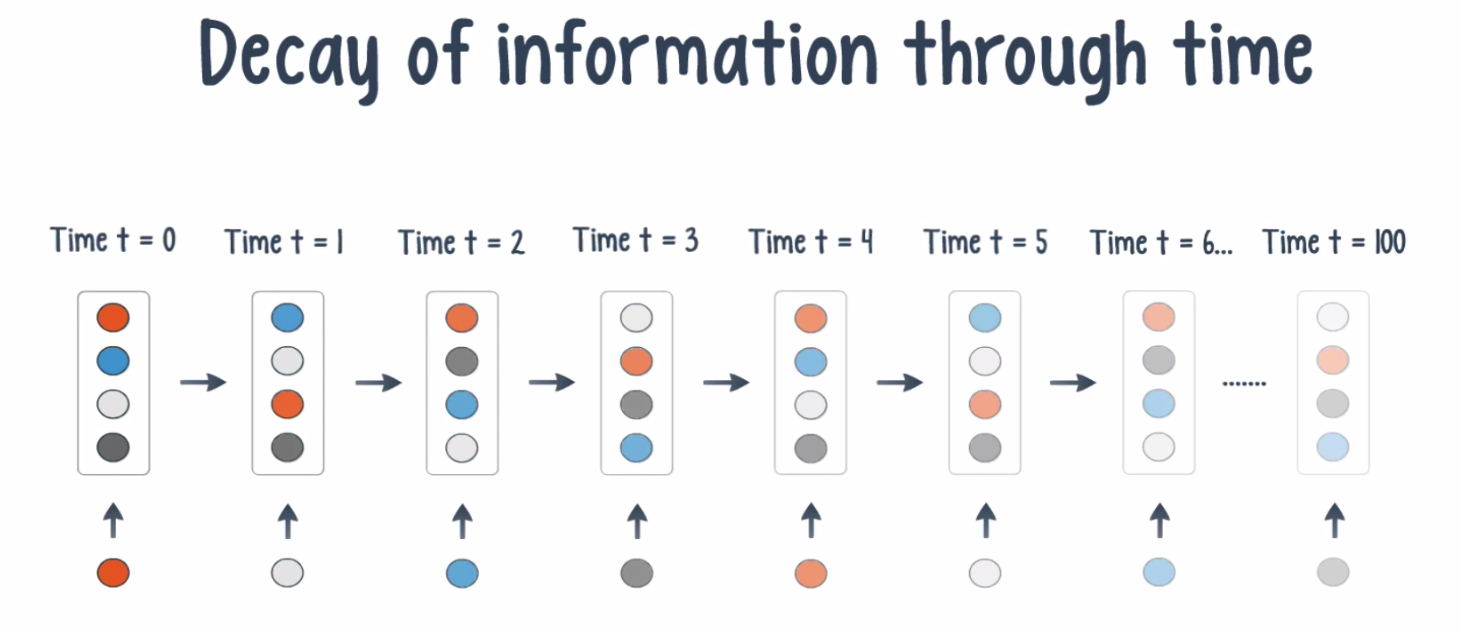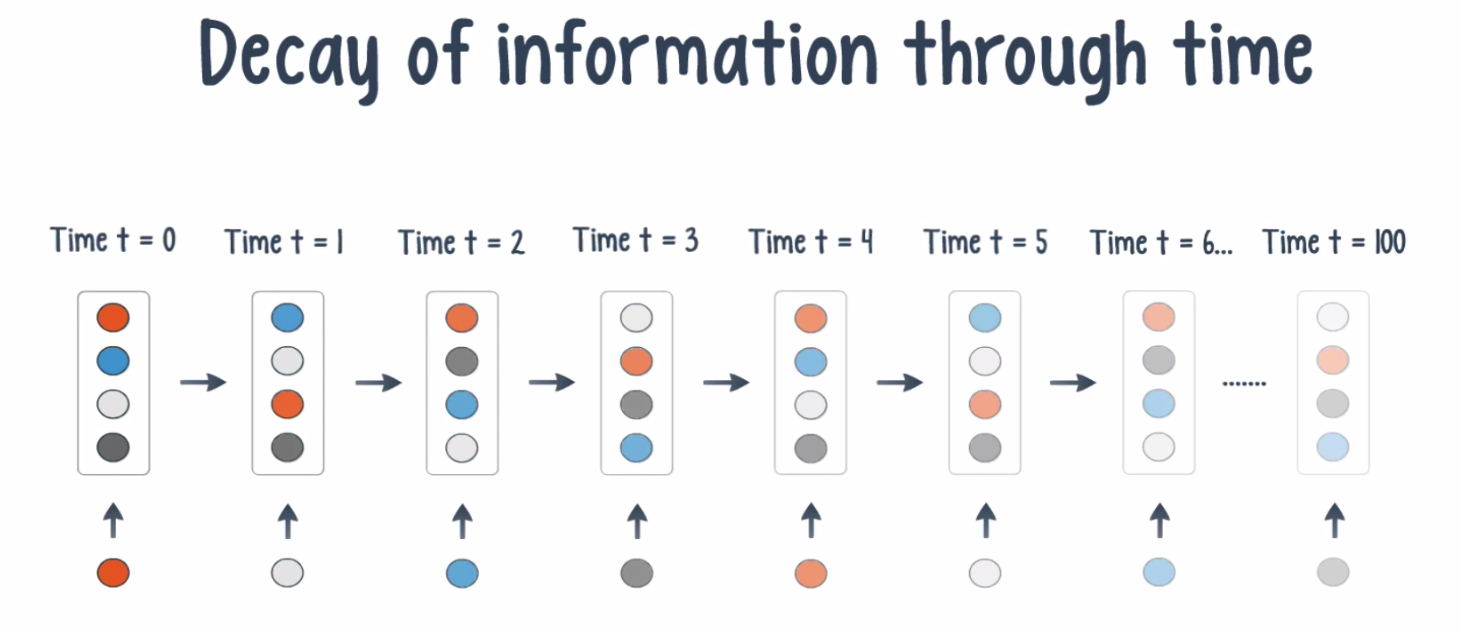

Источник: https://medium.com/

### Long Short Term Memory(LSTM)

Решить проблему исчезающего градиента призвана разновидность RNN под названием LSTM.

Long short-term memory (LSTM) юниты - это блоки из которых состоят слои одной из разновидностей рекуррентной нейронной сети(RNN). RNN состоящая из LSTM юнитов иногда называется просто LSTM. Обычно LSTM юнит представляет из себя ячейку состоящую из input gate, output gate и forget gate. Эти ячейки отвественны за запоминания значений на определенные промежутки времени.

Каждый из этих элементов можно представить как типичный искусственный нейрон в многослойной неройнной сети, они вычисляют активацию(используя функцию активации) как взвешенную сумму. Их работа сводиться к регуляции потока значений через блок LSTM, поэтому они и называются ворота или затворы(gate). Понятие долгой памяти в названии возникло из-за того что они могут запоминать информацию на более длинный период времени чем обычная RNN. LSTM хорошо подходит для классификации процессов и предсказания временных последовательностей неизвестного размера и неизвестных промежутков между важными событиями. С технической точки зрения это достигается за счет ликвидации проблем связанных с exploding и vanishing gradient'ами.

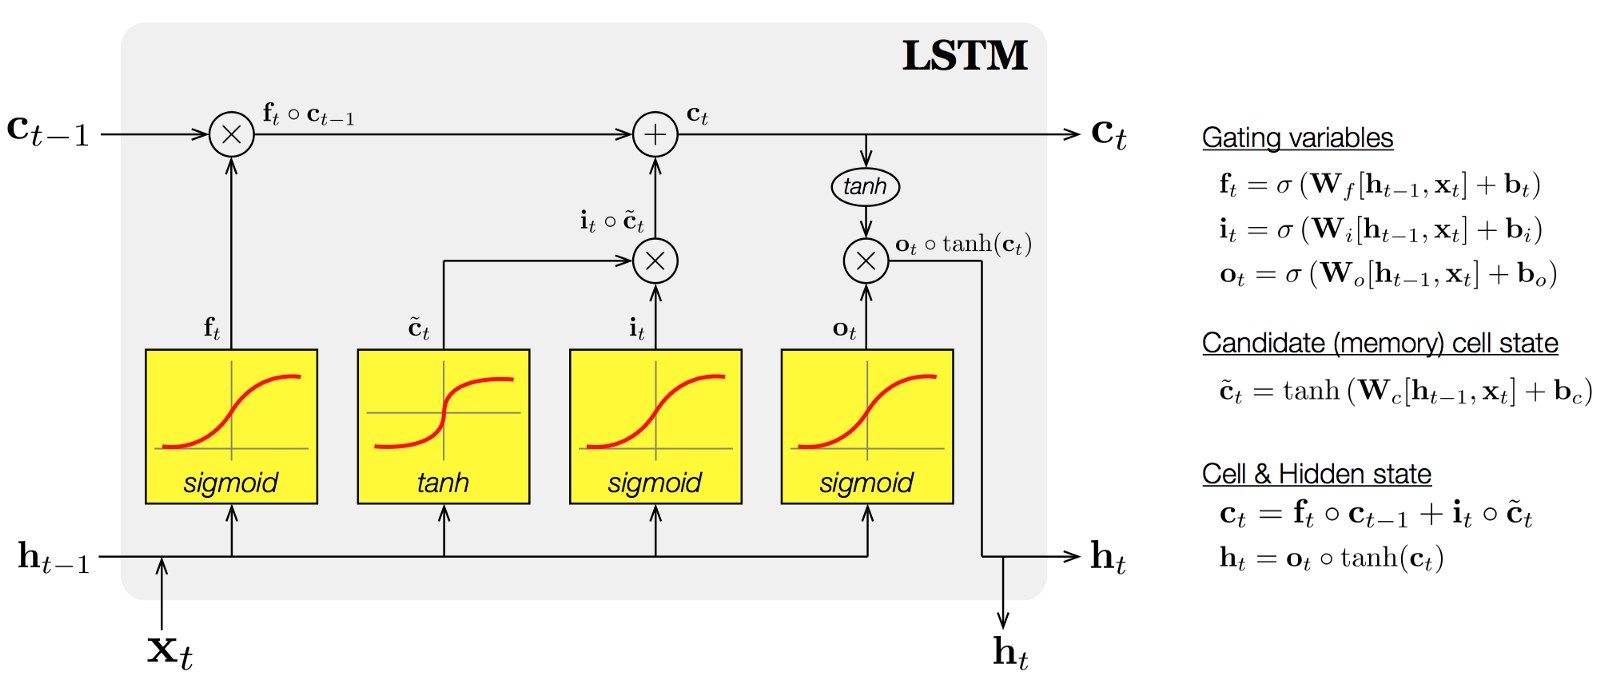

Источник: https://medium.com/

### Компоненты LSTM.  
Ниже спискок приведен список компонентов из которых состоит ячейка LSTM:


<ol>
<li>Forget Gate "f" (нейронная сеть с сигмоидой)</li>
<li>Candidate layer "С" (нейронная сеть c Tanh)</li>
<li>Input Gate "I" (нейронная сеть с сигмоидой)</li>
<li>Output Gate "O"(нейронная сеть с сигмоидой)</li>
<li>Скрытоое состояние "H" (вектор)</li>
<li>Состояние памяти "C" (вектор)</li>
<li>Входы в LSTM ячейку на любом шаге Xt (текущий input) , Ht-1 (предыдущее скрытое сотояние ) и Ct-1 (предыдущее состояние памяти)</li>
<li>Выходы LSTM ячейки это Ht (текущее скрытое состояние ) и Ct (текущее состояние памяти)</li>
</ol>







###### Работа затворов в LSTM


Во-первых LSTM ячейка берет предыдущее состояние памяти Ct-1 и умножает на значение в forget gate(f), чтобы определить, присутствует ли состояние памяти Ct. Если forget gate значение равно 0 то предыдущее состояние память полностью забывается, если же f forget gate значение равно 1 то предыдующее значение состояния памяти полностью проходит через ячейку(помните, что f gate дает значение между 0 и 1).

Ct = Ct-1 * ft

Вычисляем новое состояние памяти:

Ct = Ct + (It * C`t)

Теперь, вычисляем выходное значение:

Ht = tanh(Ct)

### GRU

Теперь, когда мы знаем как работает LSTM, давайте бегло взглянем на то, как работате GRU. GRU это более новое поколение рекуррентных нейронных сетейи и оно во многом похоже на LSTM. Но есть определенная разница. В GRU не используется состояние яченийки и используется скрытое состояние для передачи информации. В GRU также есть два затвора - reset gate и update gate.

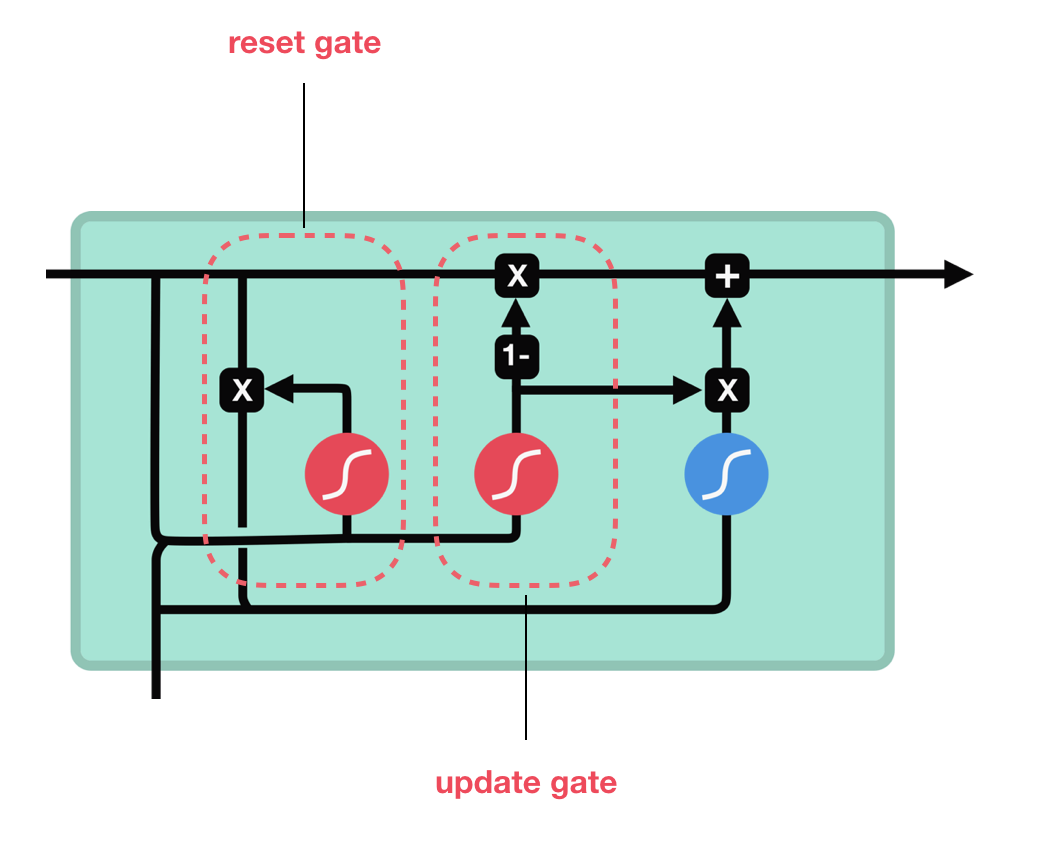

Источник: https://medium.com/

Update Gate обновляет затворы действуя подобно forget и input gate, которые используются в LSTM. Он решает какая информация будет отброшена, а какая новая информация будет добавлена. Reset Gate это другой затвор использующийся для принятия решения как много прошлой информации будет забыто. В этих особенностях и заключается архитектура GRU. GRU имеет меньше тензорных операций и соответсвенно тренеруется быстре чем LSTM. Однако нельзя сказать точно какая архитектура лучше. Исследователи и инженеры пытаются определить, что в каждом конкретном случае подойдет больше. Если говорить упрощенно то GRU может подойти тогда когда важнее скорость чем точность, а LSTM тогда когда важнее точность чем скорость. 

## Практика

Давайте попробуем сделать простую реккурентную нейронную сеть, которая будет учиться складывать числа. Для этих целей мы не будем пользоваться фреймворками для Deep Learning, чтобы посмотреть как она работает внутри.


In [2]:
# впервую очередь подключим numpy и библиотеку copy, которая понадобиться, чтобы сделать deepcopy ряда элементов

import copy, numpy as np
np.random.seed(0)

# вычислим сигмоиду
def sigmoid(x):
    output = 1/(1+np.exp(-x))
    return output

# конвертируем значение функции сигмоиды в ее производную. 
def sigmoid_output_to_derivative(output):
    return output*(1-output)

# генерация тренировочного датасета
int2binary = {}
binary_dim = 8

largest_number = pow(2,binary_dim)
binary = np.unpackbits(
    np.array([list(range(largest_number))],dtype=np.uint8).T,axis=1)
for i in range(largest_number):
    int2binary[i] = binary[i]

# входные переменные
alpha = 0.1
input_dim = 2
hidden_dim = 16
output_dim = 1


# инициализация весов нейронной сети
synapse_0 = 2*np.random.random((input_dim,hidden_dim)) - 1
synapse_1 = 2*np.random.random((hidden_dim,output_dim)) - 1
synapse_h = 2*np.random.random((hidden_dim,hidden_dim)) - 1

synapse_0_update = np.zeros_like(synapse_0)
synapse_1_update = np.zeros_like(synapse_1)
synapse_h_update = np.zeros_like(synapse_h)

# тренировочная логика
for j in range(10000):
    
    # генерация простой проблемы сложения (a + b = c)
    a_int = np.random.randint(largest_number/2) # int version
    a = int2binary[a_int] # бинарное кодирование

    b_int = np.random.randint(largest_number/2) # int version
    b = int2binary[b_int] # бинарное кодирование

    # правильный ответ
    c_int = a_int + b_int
    c = int2binary[c_int]
    
    # место где мы располагаем наши лучше результаты (бинарно закодированные)
    d = np.zeros_like(c)

    overallError = 0
    
    layer_2_deltas = list()
    layer_1_values = list()
    layer_1_values.append(np.zeros(hidden_dim))
    
    # движение вдоль позиций бинарной кодировки
    for position in range(binary_dim):
        
        # генерация input и output
        X = np.array([[a[binary_dim - position - 1],b[binary_dim - position - 1]]])
        y = np.array([[c[binary_dim - position - 1]]]).T

        # внутренний слой (input ~+ предыдущий внутренний)
        layer_1 = sigmoid(np.dot(X,synapse_0) + np.dot(layer_1_values[-1],synapse_h))

        # output layer (новое бинарное представление)
        layer_2 = sigmoid(np.dot(layer_1,synapse_1))

        # проверка упустили ли мы что-то и если да, то как много 
        layer_2_error = y - layer_2
        layer_2_deltas.append((layer_2_error)*sigmoid_output_to_derivative(layer_2))
        overallError += np.abs(layer_2_error[0])
    
        # декодируем оценку чтобы мы могли ее вывести на экран
        d[binary_dim - position - 1] = np.round(layer_2[0][0])
        
        # сохраняем внутренний слой, чтобы мы могли его использовать в след. timestep
        layer_1_values.append(copy.deepcopy(layer_1))
    
    future_layer_1_delta = np.zeros(hidden_dim)
    
    for position in range(binary_dim):
        
        X = np.array([[a[position],b[position]]])
        layer_1 = layer_1_values[-position-1]
        prev_layer_1 = layer_1_values[-position-2]
        
        # величина ошибки в output layer
        layer_2_delta = layer_2_deltas[-position-1]
        # величина ошибки в hidden layer
        layer_1_delta = (future_layer_1_delta.dot(synapse_h.T) + layer_2_delta.dot(synapse_1.T)) * sigmoid_output_to_derivative(layer_1)

        # обновление всех весов и пробуем заново
        synapse_1_update += np.atleast_2d(layer_1).T.dot(layer_2_delta)
        synapse_h_update += np.atleast_2d(prev_layer_1).T.dot(layer_1_delta)
        synapse_0_update += X.T.dot(layer_1_delta)
        
        future_layer_1_delta = layer_1_delta
    

    synapse_0 += synapse_0_update * alpha
    synapse_1 += synapse_1_update * alpha
    synapse_h += synapse_h_update * alpha    

    synapse_0_update *= 0
    synapse_1_update *= 0
    synapse_h_update *= 0
    
    # вывод на экран процесса обучения
    if(j % 1000 == 0):
        print("Error:" + str(overallError))
        print("Pred:" + str(d))
        print("True:" + str(c))
        out = 0
        for index,x in enumerate(reversed(d)):
            out += x*pow(2,index)
        print(str(a_int) + " + " + str(b_int) + " = " + str(out))
        print("------------")


Error:[3.45638663]
Pred:[0 0 0 0 0 0 0 1]
True:[0 1 0 0 0 1 0 1]
9 + 60 = 1
------------
Error:[3.63389116]
Pred:[1 1 1 1 1 1 1 1]
True:[0 0 1 1 1 1 1 1]
28 + 35 = 255
------------
Error:[3.91366595]
Pred:[0 1 0 0 1 0 0 0]
True:[1 0 1 0 0 0 0 0]
116 + 44 = 72
------------
Error:[3.72191702]
Pred:[1 1 0 1 1 1 1 1]
True:[0 1 0 0 1 1 0 1]
4 + 73 = 223
------------
Error:[3.5852713]
Pred:[0 0 0 0 1 0 0 0]
True:[0 1 0 1 0 0 1 0]
71 + 11 = 8
------------
Error:[2.53352328]
Pred:[1 0 1 0 0 0 1 0]
True:[1 1 0 0 0 0 1 0]
81 + 113 = 162
------------
Error:[0.57691441]
Pred:[0 1 0 1 0 0 0 1]
True:[0 1 0 1 0 0 0 1]
81 + 0 = 81
------------
Error:[1.42589952]
Pred:[1 0 0 0 0 0 0 1]
True:[1 0 0 0 0 0 0 1]
4 + 125 = 129
------------
Error:[0.47477457]
Pred:[0 0 1 1 1 0 0 0]
True:[0 0 1 1 1 0 0 0]
39 + 17 = 56
------------
Error:[0.21595037]
Pred:[0 0 0 0 1 1 1 0]
True:[0 0 0 0 1 1 1 0]
11 + 3 = 14
------------


Теперь давайте попробуем с помощью Keras построить LSTM нейронную сеть для оценки настроений отзвывов на IMD.

Данный датасет слишком мал, чтобы преимущества LSTM проявились, однако в учебных целях он подойдет.

В тренировке рекуррентных нейронных сетей важную роль играет размер batch, но еще большую роль играет выбор функций loss и optimizer.

In [8]:
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb
import keras 

max_features = 20000

# обрезание текстов после данного количества слов (среди top max_features наиболее используемые слова)
maxlen = 80
batch_size = 50 # увеличьте значение для ускорения обучения

print('Загрузка данных...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'тренировочные последовательности')
print(len(x_test), 'тестовые последовательности')

print('Pad последовательности (примеров в x единицу времени)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)


Загрузка данных...
25000 тренировочные последовательности
25000 тестовые последовательности
Pad последовательности (примеров в x единицу времени)
x_train shape: (25000, 80)
x_test shape: (25000, 80)


In [27]:

print('Построение модели...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# стоит попробовать использовать другие оптимайзер и другие конфигурации оптимайзеров 
opt = keras.optimizers.Adamax(learning_rate=0.0
                              
                              
                              
                              1)
model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

print('Процесс обучения...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=10, # увеличьте при необходимости
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Результат при тестировании:', score)
print('Тестовая точность:', acc)


Построение модели...
Процесс обучения...
Epoch 1/10
500/500 [==============================] - 58s 117ms/step - loss: 0.4737 - accuracy: 0.7723 - val_loss: 0.3744 - val_accuracy: 0.8317
Epoch 2/10
500/500 [==============================] - 56s 113ms/step - loss: 0.2577 - accuracy: 0.8954 - val_loss: 0.3934 - val_accuracy: 0.8433
Epoch 3/10
500/500 [==============================] - 57s 114ms/step - loss: 0.1330 - accuracy: 0.9503 - val_loss: 0.4873 - val_accuracy: 0.8313
Epoch 4/10
500/500 [==============================] - 57s 114ms/step - loss: 0.0756 - accuracy: 0.9746 - val_loss: 0.5919 - val_accuracy: 0.8236
Epoch 5/10
500/500 [==============================] - 57s 115ms/step - loss: 0.0405 - accuracy: 0.9867 - val_loss: 0.7541 - val_accuracy: 0.8236
Epoch 6/10
500/500 [==============================] - 57s 114ms/step - loss: 0.0300 - accuracy: 0.9900 - val_loss: 0.8185 - val_accuracy: 0.8146
Epoch 7/10
500/500 [==============================] - 56s 113ms/step - loss: 0.0263 - acc

KeyboardInterrupt: 

In [22]:
0.69 sgd
0.83 adam 0.01
0.51 adam 0.1
0.84 adam 0.001
0.80 adam 0.0001
0.84 adam 0.005 best epochs=3 score:0.84 далее переобучение
0.51 sgd 0.01 0.01
0.50 sgd 0.01 0.1
0.58 sgd 0.1 0.5
0.57 sgd 0.5 1
0.81 adamax 0.001
0.84 adamax 0.01 best epochs=3 score:0.85 
0.80 adamax 0.1
0.83 adamax 0.05

SyntaxError: invalid syntax (<ipython-input-22-6e39e7ee543f>, line 1)

Давайте также посмотрим пример в которм будет использоваться другой класс задач - генерация текста на основе тренировочного текста. В задачу нейросети будет входить обучившись на тексте Алиса в стране чудес и начать генерировать текст похожий на тот, что можно встретить в этой книге. Также в этом примере будет использоваться GRU.

In [31]:
import numpy as np
from keras.layers import Dense, Activation
from keras.layers.recurrent import SimpleRNN, LSTM, GRU
from keras.models import Sequential


# построчное чтение из примера с текстом 
with open("alice.txt", 'rb') as _in:
    lines = []
    for line in _in:
        line = line.strip().lower().decode("ascii", "ignore")
        if len(line) == 0:
            continue
        lines.append(line)
text = " ".join(lines)
chars = set([c for c in text])
nb_chars = len(chars)



# создание индекса символов и reverse mapping чтобы передвигаться между значениями numerical
# ID and a specific character. The numerical ID will correspond to a column
# ID и определенный символ. Numerical ID будет соответсвовать колонке
# число при использовании one-hot кодировки для представление входов символов
char2index = {c: i for i, c in enumerate(chars)}
index2char = {i: c for i, c in enumerate(chars)}

# для удобства выберете фиксированную длину последовательность 10 символов 
SEQLEN, STEP = 10, 1
input_chars, label_chars = [], []

# конвертация data в серии разных SEQLEN-length субпоследовательностей
for i in range(0, len(text) - SEQLEN, STEP):
    input_chars.append(text[i: i + SEQLEN])
    label_chars.append(text[i + SEQLEN])


# Вычисление one-hot encoding входных последовательностей X и следующего символа (the label) y

X = np.zeros((len(input_chars), SEQLEN, nb_chars), dtype=np.bool)
y = np.zeros((len(input_chars), nb_chars), dtype=np.bool)
for i, input_char in enumerate(input_chars):
    for j, ch in enumerate(input_char):
        X[i, j, char2index[ch]] = 1
    y[i, char2index[label_chars[i]]] = 1

In [ ]:



# установка ряда метапамертров  для нейронной сети и процесса тренировки
BATCH_SIZE, HIDDEN_SIZE = 512, 512
NUM_ITERATIONS = 50 # 25 должно быть достаточно
NUM_EPOCHS_PER_ITERATION = 1
NUM_PREDS_PER_EPOCH = 100


# Create a super simple recurrent neural network. There is one recurrent
# layer that produces an embedding of size HIDDEN_SIZE from the one-hot
# encoded input layer. This is followed by a Dense fully-connected layer
# across the set of possible next characters, which is converted to a
# probability score via a standard softmax activation with a multi-class
# cross-entropy loss function linking the prediction to the one-hot
# encoding character label.

'''
Создание очень простой рекуррентной нейронной сети. В ней будет один реккурентный закодированный входной слой. 
За ним последует полносвязный слой связанный с набором возможных следующих символов, которые конвертированы в вероятностные 
результаты через стандартную softmax активацию с multi-class cross-encoding loss функцию ссылающуются на предсказание 
one-hot encoding лейбл символа
'''

model = Sequential()
model.add(
    LSTM(  # вы можете изменить эту часть на LSTM или SimpleRNN, чтобы попробовать альтернативы
        HIDDEN_SIZE,
        return_sequences=False,
        input_shape=(SEQLEN, nb_chars),
        unroll=True
    )
)
model.add(Dense(nb_chars))
model.add(Activation("softmax"))
model.compile(loss="categorical_crossentropy", optimizer="rmsprop")


# выполнение серий тренировочных и демонстрационных итераций 
for iteration in range(NUM_ITERATIONS):

    # для каждой итерации запуск передачи данных в модель 
    print("=" * 50)
    print("Итерация #: %d" % (iteration))
    model.fit(X, y, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS_PER_ITERATION)

    # Select a random example input sequence.
    test_idx = np.random.randint(len(input_chars))
    test_chars = input_chars[test_idx]

    # для числа шагов предсказаний использование текущей тренируемой модели 
    # конструирование one-hot encoding для тестирования input и добавление предсказания.
    print("Генерация из посева: %s" % (test_chars))
    print(test_chars, end="")
    for i in range(NUM_PREDS_PER_EPOCH):

        # здесь one-hot encoding.
        X_test = np.zeros((1, SEQLEN, nb_chars))
        for j, ch in enumerate(test_chars):
            X_test[0, j, char2index[ch]] = 1

        # осуществление предсказания с помощью текущей модели.
        pred = model.predict(X_test, verbose=0)[0]
        y_pred = index2char[np.argmax(pred)]

        # вывод предсказания добавленного к тестовому примеру 
        print(y_pred, end="")

        # инкрементация тестового примера содержащего предсказание
        test_chars = test_chars[1:] + y_pred
print()


Итерация #: 0
1127/1127 [==============================] - 230s 204ms/step - loss: 2.2013
Генерация из посева: k it in." 
k it in." harry and her ind the was sting the was sting the was sting the was sting the was sting the was stin==================================================
Итерация #: 1
  55/1127 [>.............................] - ETA: 3:41 - loss: 1.7948

## Практическое задание

<ol>
    <li>Попробуйте изменить параметры нейронной сети работающей с датасетом imdb так, чтобы улучшить ее точность. Приложите анализ.</li>
    <li>Попробуйте изменить параметры нейронной сети генерирующий текст таким образом, чтобы добиться генерации как можно более осмысленного текста. Пришлите лучший получившейся у вас текст и опишите, что вы предприняли, чтобы его получить. Можно использовать текст другого прозведения.</li>
    <li>* Попробуйте на numpy реализовать нейронную сеть архитектуры LSTM</li>
    <li>* Предложите свои варианты решения проблемы исчезающего градиента в RNN</li>
</ol>

## Дополнительные материалы

<ol>
    <li>Оригинальная научная статья по LSTM - https://www.bioinf.jku.at/publications/older/2604.pdf</li>
    <li>Оригинальная научная статья по GRU - https://arxiv.org/abs/1406.1078</li>
</ol>

## Используемая литература 

Для подготовки данного методического пособия были использованы следующие ресурсы:
<ol>
    <li>https://www.kaggle.com/thebrownviking20/intro-to-recurrent-neural-networks-lstm-gru</li>
    <li>Шакла Н. — Машинное обучение и TensorFlow 2019</li>
    <li>Николенко, Кадурин, Архангельская: Глубокое обучение. Погружение в мир нейронных сетей 2018</li>
    <li>Aurélien Géron - Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems 2019</li>
    <li>https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21</li>
    <li>https://github.com/llSourcell/recurrent_neural_net_demo</li>
    
</ol>